In [ ]:
# Install detectron2
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# Use the below line to install detectron2 if the above one has an error
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.6'

torch:  2.2 ; cuda:  cu121
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.6) to /tmp/pip-req-build-a46lt12k
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-a46lt12k
  Running command git checkout -q d1e04565d3bec8719335b88be9e9b961bf3ec464
  Resolved https://github.com/facebookresearch/detectron2.git to commit d1e04565d3bec8719335b88be9e9b961bf3ec464
  Preparing metadata (setup.py) ... done


In [ ]:
# clone and install Detic
!git clone https://github.com/facebookresearch/Detic.git --recurse-submodules
%cd Detic
!pip install -r requirements.txt

fatal: destination path 'Detic' already exists and is not an empty directory.
/content/Detic
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-h7u2gfq0
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-h7u2gfq0
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import sys
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Detic libraries
sys.path.insert(0, '/content/Detic/third_party/CenterNet2')
sys.path.insert(0, '/content/Detic/detic')

from centernet.config import add_centernet_config
from Detic.detic.config import add_detic_config
from Detic.detic.modeling.utils import reset_cls_test

In [ ]:
cfg = get_cfg()
add_centernet_config(cfg)
add_detic_config(cfg)
cfg.merge_from_file("/content/Detic/configs/Detic_LI_CLIP_SwinB_896b32_4x_ft4x_max-size.yaml")
cfg.MODEL.WEIGHTS = 'https://dl.fbaipublicfiles.com/detic/Detic_LCOCOI21k_CLIP_SwinB_896b32_4x_ft4x_max-size.pth'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.ROI_BOX_HEAD.ZEROSHOT_WEIGHT_PATH = 'rand'
cfg.MODEL.ROI_HEADS.ONE_CLASS_PER_PROPOSAL = True # For better visualization purpose. Set to False for all classes.
# cfg.MODEL.DEVICE='cpu' # uncomment this to use cpu-only mode.
predictor = DefaultPredictor(cfg)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Detic_LCOCOI21k_CLIP_SwinB_896b32_4x_ft4x_max-size.pth: 702MB [00:10, 69.0MB/s]                           
roi_heads.box_predictor.0.cls_score.zs_weight
roi_heads.box_predictor.0.freq_weight
roi_heads.box_predictor.1.cls_score.zs_weight
roi_heads.box_predictor.1.freq_weight
roi_heads.box_predictor.2.cls_score.zs_weight
roi_heads.box_predictor.2.freq_weight


In [ ]:
# Setup the model's vocabulary using build-in datasets

BUILDIN_CLASSIFIER = {
    'lvis': 'datasets/metadata/lvis_v1_clip_a+cname.npy',
    'objects365': 'datasets/metadata/o365_clip_a+cnamefix.npy',
    'openimages': 'datasets/metadata/oid_clip_a+cname.npy',
    'coco': 'datasets/metadata/coco_clip_a+cname.npy',
}

BUILDIN_METADATA_PATH = {
    'lvis': 'lvis_v1_val',
    'objects365': 'objects365_v2_val',
    'openimages': 'oid_val_expanded',
    'coco': 'coco_2017_val',
}

vocabulary = 'objects365' # change to 'lvis', 'objects365', 'openimages', or 'coco'
metadata = MetadataCatalog.get(BUILDIN_METADATA_PATH[vocabulary])
classifier = BUILDIN_CLASSIFIER[vocabulary]
num_classes = len(metadata.thing_classes)
reset_cls_test(predictor.model, classifier, num_classes)

Resetting zs_weight datasets/metadata/o365_clip_a+cnamefix.npy


In [ ]:
# Download a sample image and display. Replace path here to try your own images!
# !wget https://web.eecs.umich.edu/~fouhey/fun/desk/desk.jpg
im = cv2.imread("/content/Scene5/frame010.jpg")
cv2_imshow(im)

AttributeError: 'NoneType' object has no attribute 'clip'

In [ ]:
# Run model and show results
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

0


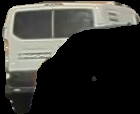

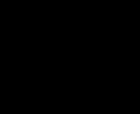

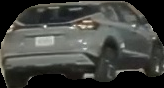

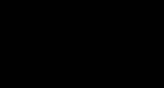

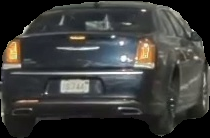

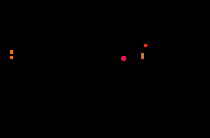

{'frame0': {'0': {'Class': 305, 'Center': [602, 388], 'Box': [597.3021850585938, 383.0728454589844, 607.0463256835938, 392.9612121582031]}, '1': {'Class': 305, 'Center': [475, 368], 'Box': [468.5247497558594, 359.9407653808594, 483.3625793457031, 377.39715576171875]}, '2': {'Class': 305, 'Center': [579, 388], 'Box': [574.8770141601562, 383.8278503417969, 584.181396484375, 394.1421813964844]}, '3': {'Class': 65, 'Center': [314, 465], 'Box': [244.8689422607422, 408.51806640625, 384.5811767578125, 522.9519653320312], 'Tail_Light': 0}, '4': {'Class': 267, 'Center': [510, 365], 'Box': [503.3690490722656, 357.5316162109375, 517.4061889648438, 374.26025390625]}, '5': {'Class': 305, 'Center': [311, 381], 'Box': [306.1873779296875, 370.7191467285156, 315.99627685546875, 391.6407775878906]}, '6': {'Class': 267, 'Center': [945, 414], 'Box': [934.5098876953125, 407.6573486328125, 956.1218872070312, 422.0500183105469]}, '7': {'Class': 305, 'Center': [783, 418], 'Box': [777.8587646484375, 413.910339

In [ ]:
# Run model and show results
from glob import glob

def get_mean_hsv(image):

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Mask pixels where at least one of the HSV components is non-zero
    mask = cv2.inRange(hsv_image, np.array([1, 1, 1]), np.array([255, 255, 255]))

    # Calculate mean of non-zero pixels for each channel
    mean_hue = np.mean(hsv_image[:, :, 0][mask > 0])
    mean_saturation = np.mean(hsv_image[:, :, 1][mask > 0])
    mean_value = np.mean(hsv_image[:, :, 2][mask > 0])

    return mean_hue, mean_saturation, mean_value

Accepted_Classes = [0, 5, 34, 40, 44, 46, 49, 53, 65, 66, 87, 127, 176, 199, 267, 305]
Vehicle_Classes = [5, 34, 49, 65, 87, 199]
paths = sorted(glob("/content/Scene11_2/frame*.jpg"))
f = open("/content/Scene11_Objects_Detic_2D.json","w")
Final_Dict = {}
count = 0
kernel = np.ones((3, 3), np.uint8)
for path in paths:
  count += 1
  # if count!=419:
  #   continue
  print(paths.index(path))
  Int_Dict = {}
  im = cv2.imread(path)
  outputs = predictor(im)
  # v = Visualizer(im[:, :, ::-1], metadata)
  # out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  # cv2_imshow(out.get_image()[:, :, ::-1])
  Classes = outputs["instances"].pred_classes.cpu().numpy()
  Scores = outputs["instances"].scores.cpu().numpy()
  Boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()
  Masks = outputs["instances"].pred_masks.cpu().numpy()
  H,S,V = get_mean_hsv(im)
  In_Count = 0
  # print(H,S,V)
  for i in range(len(Boxes)):
    if Classes[i] in Accepted_Classes:
      Class = int(Classes[i])

      Dict = {}
      Box = Boxes[i]
      X1, Y1, X2, Y2 = Box.tolist()
      Center = [int((X1 + X2))//2, int((Y1+Y2))//2]
      Dict['Class'] = Class
      Dict['Center'] = Center
      Dict['Box'] = Box.tolist()
      if Class in Vehicle_Classes:
        Mask = Masks[i]
        Mask = Mask[int(Box[1]):int(Box[3]), int(Box[0]):int(Box[2])]
        Mask.dtype = np.uint8
        Cropped_Image = im[int(Box[1]):int(Box[3]), int(Box[0]):int(Box[2])]
        Masked_Image = cv2.bitwise_and(Cropped_Image, Cropped_Image, mask = Mask)
        cv2_imshow(Masked_Image)
        Masked_Image = cv2.cvtColor(Masked_Image,cv2.COLOR_BGR2HSV)
        # Lower1 = np.array([0,70,220])
        # Upper1 = np.array([10,255,255])
        # Lower2 = np.array([160,70,220])
        # Upper2 = np.array([179,255,255])
        Lower = np.array([0,0,230])
        Upper = np.array([255,255,255])
        # Color_mask1 = cv2.inRange(Masked_Image, Lower1, Upper1)
        # Color_mask2 = cv2.inRange(Masked_Image, Lower2, Upper2)
        Color_mask = cv2.inRange(Masked_Image, Lower, Upper)
        Masked_Image = cv2.bitwise_and(Masked_Image,Masked_Image,mask = Color_mask)
        Masked_Image = cv2.erode(Masked_Image, kernel, iterations=1)
        Masked_Image = cv2.dilate(Masked_Image, kernel, iterations=1)
        cv2_imshow(Masked_Image)
        Masked_Image = cv2.cvtColor(Masked_Image,cv2.COLOR_HSV2BGR)
        Masked_Image = cv2.cvtColor(Masked_Image,cv2.COLOR_BGR2GRAY)
        # Dict['Mask'] = Mask.tolist()
        Contour, _ = cv2.findContours(Masked_Image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        # print(len(Contour))
        if len(Contour)>0:
          Dict['Tail_Light'] = 1
        else:
          Dict['Tail_Light'] = 0

      Int_Dict[str(int(In_Count))] = Dict
      In_Count += 1

  Final_Dict['frame'+str(int(paths.index(path)))] = Int_Dict

print(Final_Dict)
json.dump(Final_Dict, indent = 4, fp = f)
f.close()

In [ ]:
# look at the outputs.
# See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
# print(outputs["instances"].pred_classes) # class index
# print([metadata.thing_classes[x] for x in outputs["instances"].pred_classes.cpu().tolist()]) # class names
# print(outputs["instances"].scores)
# print(outputs["instances"].pred_boxes)

Classes = outputs["instances"].pred_classes.cpu().numpy()
Scores = outputs["instances"].scores.cpu().numpy()
Boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()
# print(outputs)["instances"]
Masks = outputs["instances"].pred_masks.cpu().numpy()
print(Masks[0].shape)
for i in range(len(Masks)):
  Mask = Masks[i]
  Box = Boxes[i]
  Mask = Mask[int(Box[1]):int(Box[3]), int(Box[0]):int(Box[2])]
  print(Mask.shape)
  print(Mask)
print(Boxes)
